In [3]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load an official model

# Export the model
model.export(format='onnx')

Ultralytics YOLOv8.2.2 🚀 Python-3.9.2 torch-2.2.2+cu121 CPU (Intel Core(TM) i5-8300H 2.30GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)


/usr/local/lib/python3.9/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 1.2s, saved as 'yolov8n.onnx' (12.2 MB)

Export complete (3.3s)
Results saved to /com.docker.devenvironments.code/experiments
Predict:         yolo predict task=detect model=yolov8n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8n.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


'yolov8n.onnx'

## Quantise Onnx Model

In [18]:
import onnx
from onnxruntime.quantization import quantize_dynamic, QuantType

model_fp32 = 'yolov8n.onnx'
model_quant = 'yolov8n_quant.onnx'
quantized_model = quantize_dynamic(model_fp32, model_quant, weight_type=QuantType.QUInt8, nodes_to_exclude=['/conv1/Conv'])

## Predict with YOLO Weights


0: 384x640 13 persons, 1 motorcycle, 74.8ms
Speed: 2.3ms preprocess, 74.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


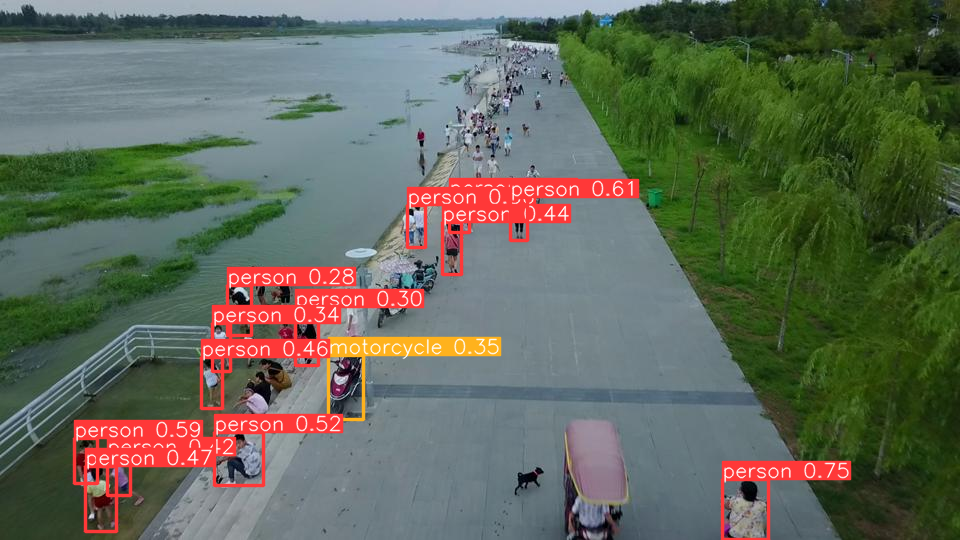

In [19]:
# Run batched inference on a list of images
results = model(['../datasets/vis-drone-2019/train/img/0000013_00465_d_0000067.jpg'])  # return a list of Results objects
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen

In [23]:
validation_results = model.val(data='../ultralytics/ultralytics/cfg/datasets/VisDrone.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6)

Ultralytics YOLOv8.2.2 🚀 Python-3.9.2 torch-2.2.2+cu121 CPU (Intel Core(TM) i5-8300H 2.30GHz)


val: Scanning /com.docker.devenvironments.code/experiments/datasets/VisDrone/VisDrone2019-DET-val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [01:00<00:00,  1.72s/it]


                   all        548      38759     0.0815     0.0146      0.045      0.026
                person        548       8844      0.547     0.0851      0.311      0.169
               bicycle        548       5125          0          0          0          0
                   car        548       1287   0.000835    0.00389   0.000421   0.000236
            motorcycle        548      14064          0          0          0          0
              airplane        548       1975          0          0          0          0
                   bus        548        750      0.126     0.0427     0.0678     0.0558
                 train        548       1045          0          0          0          0
                 truck        548        532     0.0167     0.0094    0.00843    0.00674
                  boat        548        251     0.0333    0.00398     0.0173     0.0156
         traffic light        548       4886     0.0909    0.00102     0.0455     0.0127
Speed: 1.1ms preproce

## Load Onnx and run

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading yolov8n.onnx for ONNX Runtime inference...

image 1/1 /com.docker.devenvironments.code/experiments/../datasets/vis-drone-2019/train/img/0000013_00465_d_0000067.jpg: 640x640 13 persons, 1 motorcycle, 65.9ms
Speed: 3.9ms preprocess, 65.9ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)


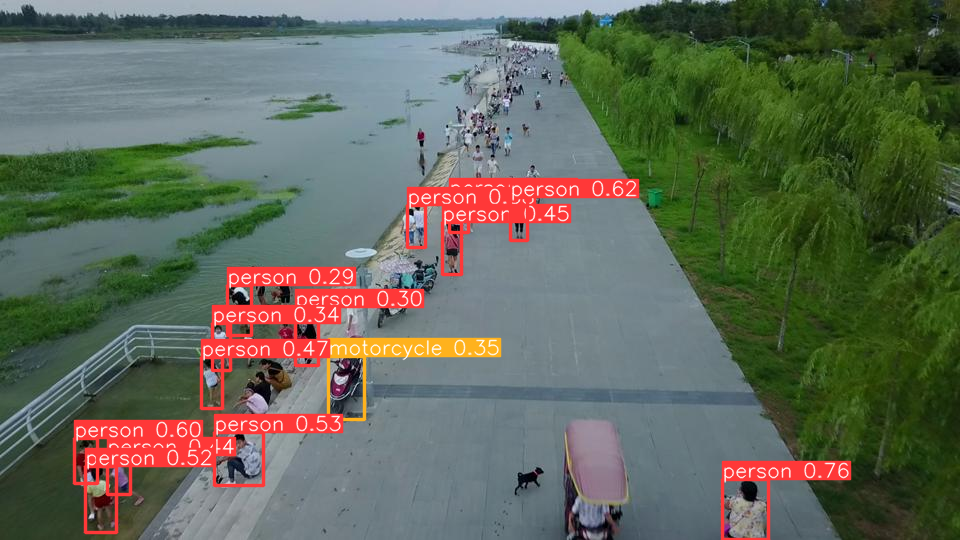

In [24]:
# Load the exported ONNX model
onnx_model = YOLO('yolov8n.onnx')

# Run inference
results = onnx_model('../datasets/vis-drone-2019/train/img/0000013_00465_d_0000067.jpg')

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen

In [25]:
validation_results = onnx_model.val(data='../ultralytics/ultralytics/cfg/datasets/VisDrone.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6)

Ultralytics YOLOv8.2.2 🚀 Python-3.9.2 torch-2.2.2+cu121 CPU (Intel Core(TM) i5-8300H 2.30GHz)
Loading yolov8n.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models


val: Scanning /com.docker.devenvironments.code/experiments/datasets/VisDrone/VisDrone2019-DET-val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 548/548 [00:45<00:00, 12.10it/s]


                   all        548      38759     0.0802     0.0148     0.0445     0.0259
                person        548       8844       0.53     0.0838      0.303      0.166
               bicycle        548       5125          0          0          0          0
                   car        548       1287    0.00115    0.00544   0.000578   0.000331
            motorcycle        548      14064          0          0          0          0
              airplane        548       1975          0          0          0          0
                   bus        548        750      0.123      0.044     0.0671     0.0553
                 train        548       1045          0          0          0          0
                 truck        548        532     0.0175     0.0094    0.00891    0.00677
                  boat        548        251     0.0323    0.00398     0.0166     0.0149
         traffic light        548       4886      0.098    0.00102     0.0491     0.0157
Speed: 0.9ms preproce

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading yolov8n_quant.onnx for ONNX Runtime inference...

image 1/1 /com.docker.devenvironments.code/experiments/../datasets/vis-drone-2019/train/img/0000013_00465_d_0000067.jpg: 640x640 17 persons, 1 motorcycle, 90.8ms
Speed: 2.9ms preprocess, 90.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


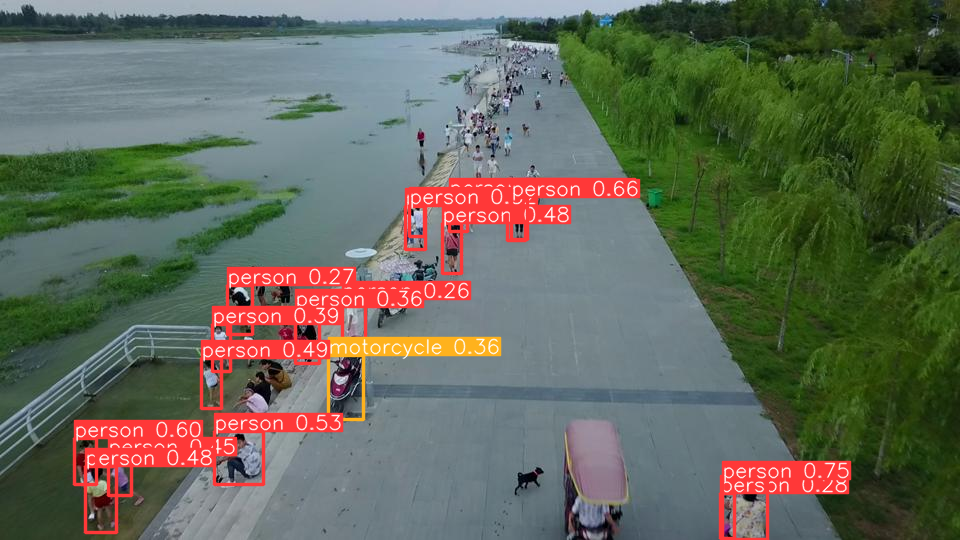

In [26]:
# Load the exported ONNX model
onnx_model_quantised = YOLO('yolov8n_quant.onnx')

# Run inference
results = onnx_model_quantised('../datasets/vis-drone-2019/train/img/0000013_00465_d_0000067.jpg')

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen

In [27]:
validation_results = onnx_model_quantised.val(data='../ultralytics/ultralytics/cfg/datasets/VisDrone.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6)

Ultralytics YOLOv8.2.2 🚀 Python-3.9.2 torch-2.2.2+cu121 CPU (Intel Core(TM) i5-8300H 2.30GHz)
Loading yolov8n_quant.onnx for ONNX Runtime inference...
Forcing batch=1 square inference (1,3,640,640) for non-PyTorch models


val: Scanning /com.docker.devenvironments.code/experiments/datasets/VisDrone/VisDrone2019-DET-val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 548/548 [00:56<00:00,  9.74it/s]


                   all        548      38759     0.0794     0.0155     0.0441     0.0251
                person        548       8844      0.547     0.0813       0.31      0.166
               bicycle        548       5125          0          0          0          0
                   car        548       1287   0.000686    0.00311   0.000348   0.000193
            motorcycle        548      14064          0          0          0          0
              airplane        548       1975          0          0          0          0
                   bus        548        750      0.125     0.0587     0.0688     0.0559
                 train        548       1045          0          0          0          0
                 truck        548        532      0.015    0.00752    0.00761    0.00552
                  boat        548        251     0.0238    0.00398     0.0121     0.0109
         traffic light        548       4886     0.0833   0.000819     0.0417     0.0125
Speed: 0.9ms preproce